<div align="center" style="font-size:24px;"><b>Term Deposit Subscription Prediction – Bank Marketing Dataset</b><br><br>By Marcela Lizarazo </div>

## Table of Contents
1. Introduction  
2. Data Description
3. Import required libraries
4. Data Loading
5. Exploratory Data Analysis (EDA)
6. Data Cleaning and Transformation
7. Classification Model – Predict if client will subscribe 
8. Client Segmentation – K-Means Clustering
9. Apply Trained Model and Segmentation to the Test Set
10. Business Insights and Recommendations

## 1. Introduction

This dataset focuses on analyzing client behavior and campaign performance in a series of direct marketing efforts conducted by a Portuguese banking institution. The primary goal of the project is to predict whether a client will subscribe to a term deposit based on demographic, economic, and campaign-related features.

The dataset originates from the UCI Machine Learning Repository and includes 45,211 observations in its original form. For the purpose of this project, a synthetic training and test set were provided as part of a case study. Each record corresponds to a single client contact and includes variables such as job type, marital status, education level, communication channel, and outcome of any previous marketing interactions.

The target variable is binary (`y`), indicating whether or not the client subscribed to a term deposit following the latest contact attempt (`yes`/`no`).

## 2. Data Description

The dataset contains structured information from direct marketing phone campaigns conducted by a Portuguese bank. Each row represents an individual client and their characteristics at the time of contact.

### Demographic and Client Information:
- **ID**: Unique identifier for each client (categorical).
- **age**: Client's age in years (numeric).
- **job**: Type of job (categorical). Possible values:
  - 'admin.', 'blue-collar', 'entrepreneur', 'housemaid',
  - 'management', 'retired', 'self-employed', 'services',
  - 'student', 'technician', 'unemployed', 'unknown'
- **marital**: Marital status (categorical). Possible values:
  - 'divorced', 'married', 'single', 'unknown'
- **education**: Education level (categorical). Possible values:
  - 'basic.4y', 'basic.6y', 'basic.9y', 'high.school',
  - 'illiterate', 'professional.course', 'university.degree', 'unknown'
- **default**: Has credit in default? (categorical): 'yes', 'no', 'unknown'
- **housing**: Has a housing loan? (categorical): 'yes', 'no', 'unknown'
- **loan**: Has a personal loan? (categorical): 'yes', 'no', 'unknown'

### Contact and Campaign Information:
- **contact**: Communication type used for the last contact (categorical): 'cellular', 'telephone'
- **month**: Last contact month of the year (categorical): 
  - 'jan', 'feb', 'mar', 'apr', 'may', 'jun',
  - 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'
- **day_of_week**: Last contact day of the week (categorical): 'mon', 'tue', 'wed', 'thu', 'fri'
- **duration**: Duration of the last contact in seconds (numeric).  
  *Important note: although this variable is strongly correlated with the target, it is not usable for predictive modeling, as it’s only known after the call ends.*

### Campaign History:
- **campaign**: number of contacts performed during this campaign and for this client (numeric).
- **pdays**: mber of days that passed by after the client was last contacted from a previous campaign .  
  - Value 999 indicates the client was **not previously contacted**.
- **previous**: Number of contacts before this campaign (numeric).
- **poutcome**: Outcome of the previous campaign (categorical): 
  - 'failure', 'nonexistent', 'success'

### Economic Indicators:
- **emp.var.rate**: Employment variation rate - quarterly indicator (numeric).
- **cons.price.idx**: Consumer price index - monthly indicator (numeric).
- **cons.conf.idx**: Consumer confidence index - monthly indicator (numeric).
- **euribor3m**: Euribor 3 month rate - daily indicator (numeric).
- **nr.employed**: Number of employees - quarterly indicator (numeric).

### Target Variable:
- **y**: Indicates whether the client subscribed to a term deposit (binary):
  - 'yes' = client subscribed  
  - 'no' = client did not subscribe

## 3. Import required libraries

In [1]:
# For working with data
import pandas as pd
import numpy as np

# For visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# For modeling and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from imblearn.over_sampling import SMOTE

# For clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA 
# Set visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)

## 4. Data Loading

In [2]:
# Load training and test datasets

# Load Excel files into DataFrames
train_df = pd.read_excel("training_set.xlsx")
test_df = pd.read_excel("test_set.xlsx")

In [3]:
# Show first and last 5 rows of each dataset
print("Training data:")
display(train_df.head())
display(train_df.tail())

print("Test data:")
display(test_df.head())
display(train_df.tail())

Training data:


,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1,42,admin.,married,high.school,no,yes,no,telephone,may,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,2,60,management,married,university.degree,no,yes,no,cellular,aug,...,10,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
2,3,53,blue-collar,divorced,high.school,no,yes,no,cellular,apr,...,3,999,0,nonexistent,-1.8,93.075,-47.1,1.479,5099.1,no
3,4,41,services,single,high.school,no,yes,no,telephone,sep,...,1,9,3,success,-1.1,94.199,-37.5,0.879,4963.6,no
4,5,50,blue-collar,married,basic.9y,no,yes,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no


,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29365,29366,50,admin.,married,high.school,no,yes,yes,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
29366,29367,41,self-employed,married,basic.4y,unknown,yes,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
29367,29368,38,unemployed,married,professional.course,no,yes,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,yes
29368,29369,33,technician,married,professional.course,no,no,no,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
29369,29370,53,blue-collar,married,basic.4y,no,no,no,telephone,aug,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,yes


Test data:


,ID,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1,46,services,married,basic.9y,unknown,no,no,telephone,may,...,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
1,2,43,blue-collar,married,unknown,unknown,no,no,telephone,may,...,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,3,25,services,single,high.school,no,yes,no,telephone,may,...,222,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,4,38,blue-collar,married,basic.6y,no,yes,no,telephone,may,...,312,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,5,46,blue-collar,married,basic.6y,unknown,yes,yes,telephone,may,...,440,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


,ID,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
29365,29366,50,admin.,married,high.school,no,yes,yes,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,no
29366,29367,41,self-employed,married,basic.4y,unknown,yes,no,telephone,may,...,3,999,0,nonexistent,1.1,93.994,-36.4,4.856,5191.0,no
29367,29368,38,unemployed,married,professional.course,no,yes,no,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.864,5191.0,yes
29368,29369,33,technician,married,professional.course,no,no,no,cellular,jul,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,yes
29369,29370,53,blue-collar,married,basic.4y,no,no,no,telephone,aug,...,3,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,yes


### Initial data review

By reviewing the first and last 5 rows of the dataset, we can confirm the following:

- **Structure appears consistent**: All rows seem to contain complete values, with no visible missing data in any of the key fields.
- **Variable `y` (target)** is present at the end of the dataset and is formatted as expected with values `'yes'` and `'no'`.
- The dataset includes a mix of **categorical variables** (e.g., `job`, `marital`, `education`, `poutcome`) and **numerical variables** (e.g., `age`, `duration`, `emp.var.rate`).
- The `ID` column appears to be a unique identifier for each row, with no repeated values in the sample shown.
- No immediately visible anomalies (e.g., null rows, repeated headers, corrupted records) in either the top or bottom of the dataset.

This confirms that the file was loaded correctly and is ready for further exploration.

## 5. Exploratory Data Analysis (EDA)

In [4]:
# Explore basic dataset structure

# Dimensions of the training dataset
print("Training set shape:")
print(train_df.shape)

# Dataset information (types, nulls) 
print("\nTraining set info:")
train_df.info()

Training set shape:
(29370, 22)

Training set info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29370 entries, 0 to 29369
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              29370 non-null  int64  
 1   age             29370 non-null  int64  
 2   job             29370 non-null  object 
 3   marital         29370 non-null  object 
 4   education       29370 non-null  object 
 5   default         29370 non-null  object 
 6   housing         29370 non-null  object 
 7   loan            29370 non-null  object 
 8   contact         29370 non-null  object 
 9   month           29370 non-null  object 
 10  day_of_week     29370 non-null  object 
 11  duration        29370 non-null  int64  
 12  campaign        29370 non-null  int64  
 13  pdays           29370 non-null  int64  
 14  previous        29370 non-null  int64  
 15  poutcome        29370 non-null  object 
 16  emp.var.rate    29370 no

#### Data Structure Overview

- The training dataset contains **29,370 rows** and **22 columns**.
- All columns are **complete** — no missing values were detected in any field (`Non-Null Count = 29370`).
- The dataset includes:
  - **11 categorical variables** (dtype: object), such as `job`, `marital`, `education`, `month`, `contact`, etc.
  - **6 integer variables** (dtype: int64), including `age`, `duration`, `campaign`, `pdays`, `previous`, and the target `y`.
  - **5 float variables** (dtype: float64), mostly economic indicators such as `emp.var.rate`, `euribor3m`, and `nr.employed`.

This confirms that the data is clean and ready for deeper analysis.

In [5]:
# Summary statistics of numerical columns
print("\nTraining set descriptive statistics:")
display(train_df.describe())


Training set descriptive statistics:


,ID,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000,29370.000000
mean,14685.500000,41.553320,259.008274,2.566633,962.451345,0.173000,0.077654,93.575800,-40.533435,3.616742,5166.947821
std,8478.533039,10.539686,258.630820,2.782771,186.972625,0.494238,1.572409,0.580017,4.630256,1.735684,72.210813
min,1.000000,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,7343.250000,34.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,14685.500000,40.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,22027.750000,49.000000,320.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,29370.000000,100.000000,4199.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


#### Descriptive Statistics – Numeric Variables

- **age**: ranges from 18 to 100, with an average of ~41.5 years. 50% of clients are aged 40 or below.
- **duration**: call duration ranges from 0 to 4199 seconds, with a mean around 259s (~4.3 minutes). This variable is highly predictive but will be excluded from modeling, as it's only known after the call.
- **campaign**: some clients were contacted up to 56 times in the same campaign. Median is 2, but high max suggests outliers.
- **pdays**: 999 means “not previously contacted” and is the most frequent value. Median = 999 confirms that most clients were new.
- **previous**: most clients had 0 previous contacts (median = 0).
- **Economic indicators**:
  - emp.var.rate: ranges from -3.4% to 1.4% → reflects economic fluctuation.
  - euribor3m: ranges from 0.63 to 5.04 → interest rate context during the campaigns.
  - nr.employed: values near 5228 show limited variation → reflects general market conditions, not client-specific info.

These insights will guide variable selection and help flag outliers for later review.

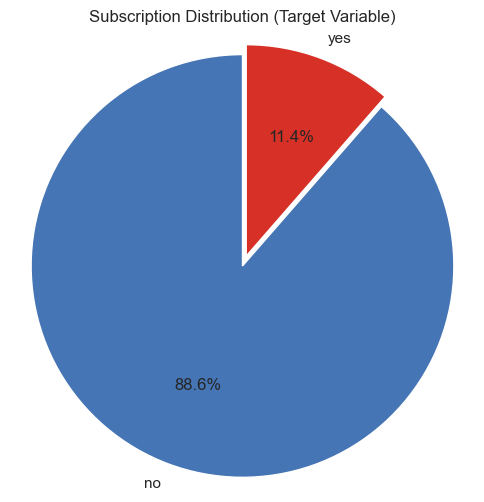

In [6]:
# Plot target distribution as pie chart

# Get proportions
target_counts = train_df['y'].value_counts()
labels = target_counts.index
sizes = target_counts.values
colors = ['#4575b4', '#d73027'] 
explode = (0.05, 0) 

plt.figure(figsize=(6,6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode)
plt.title('Subscription Distribution (Target Variable)')
plt.axis('equal') 
plt.show()



#### Target Variable Distribution

The target variable `y` indicates whether a client subscribed to a term deposit after being contacted in the campaign. It is a binary categorical variable with two possible values: `yes` and `no`.

##### Distribution:
- **No**: 26,019 clients (**88.6%**)
- **Yes**: 3,351 clients (**11.4%**)

The target variable `y` is imbalanced, with approximately 89% of clients not subscribing to a term deposit and only 11% saying yes. This is expected in marketing campaigns, where the majority of contacts do not result in a conversion.

This imbalance will be kept in mind during model evaluation. Instead of relying only on accuracy, we will also consider metrics like **precision**, **recall**, and **F1-score** to better understand the model’s performance on the minority class.

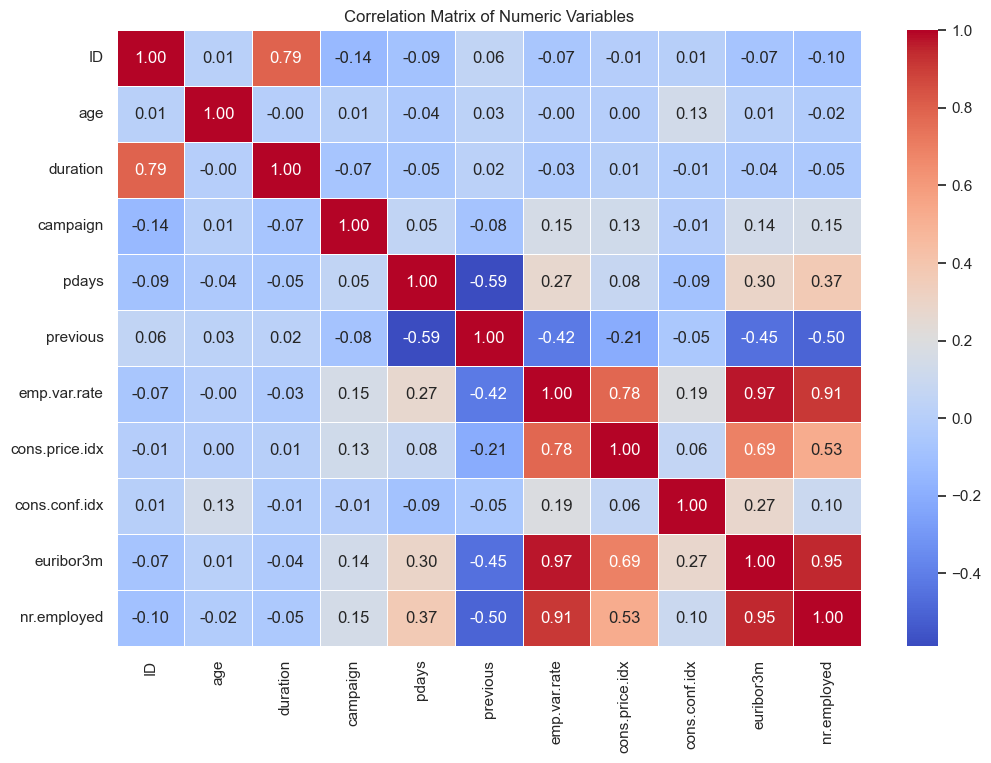

In [7]:
# Show correlation heatmap between numeric variables

# Select only numeric columns
numeric_cols = train_df.select_dtypes(include=['int64', 'float64'])

# Calculate correlation
correlation_matrix = numeric_cols.corr()

# Plot the heat map
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix of Numeric Variables")
plt.show()

### Correlation Analysis – Numeric Variables

The heatmap shows the pairwise Pearson correlation coefficients between all numerical variables. Correlation values range from -1 (strong negative) to +1 (strong positive). The main observations are:

#### Strong Positive Correlations:
- **emp.var.rate ↔ euribor3m (0.97)**: These two economic indicators move very closely together, reflecting shared economic cycles.
- **emp.var.rate ↔ nr.employed (0.91)** and **euribor3m ↔ nr.employed (0.95)**: These three are strongly linked, suggesting that when employment rises, interest rates and economic confidence tend to rise as well.
- **emp.var.rate ↔ cons.price.idx (0.78)**: Employment conditions are positively associated with consumer price levels.

Although these variables are not client-specific, they reflect the **economic environment** in which the marketing campaign occurred. They may contain redundant information but are still valuable context.

#### Moderate to Strong Negative Correlations:
- **previous ↔ pdays (-0.59)**: When `pdays` is high (i.e., 999 = not contacted before), the number of previous contacts is typically zero — this relationship is expected and confirms data consistency.
- **previous ↔ nr.employed (-0.50)**: May reflect indirect influence or seasonal trends in campaign strategy.

#### High correlation between `ID` and `duration` (0.79):
This is likely due to the order of records in the dataset. It reinforces that `ID` is not a feature to include in modeling.  
Similarly, although `duration` is predictive, it is excluded from the model because it is only known after the contact is made.

#### Low or no correlation:
- Variables such as `age`, `campaign`, and `cons.conf.idx` show very weak correlation with other features. Their predictive value will be evaluated by the model itself.

#### Conclusion:
- Multicollinearity exists between several **economic indicators**. While this is not a problem for tree-based models (like Random Forest), it may need to be addressed if using regression-based models.
- `ID` and `duration` will be removed from the feature set to avoid data leakage or artificial correlation.

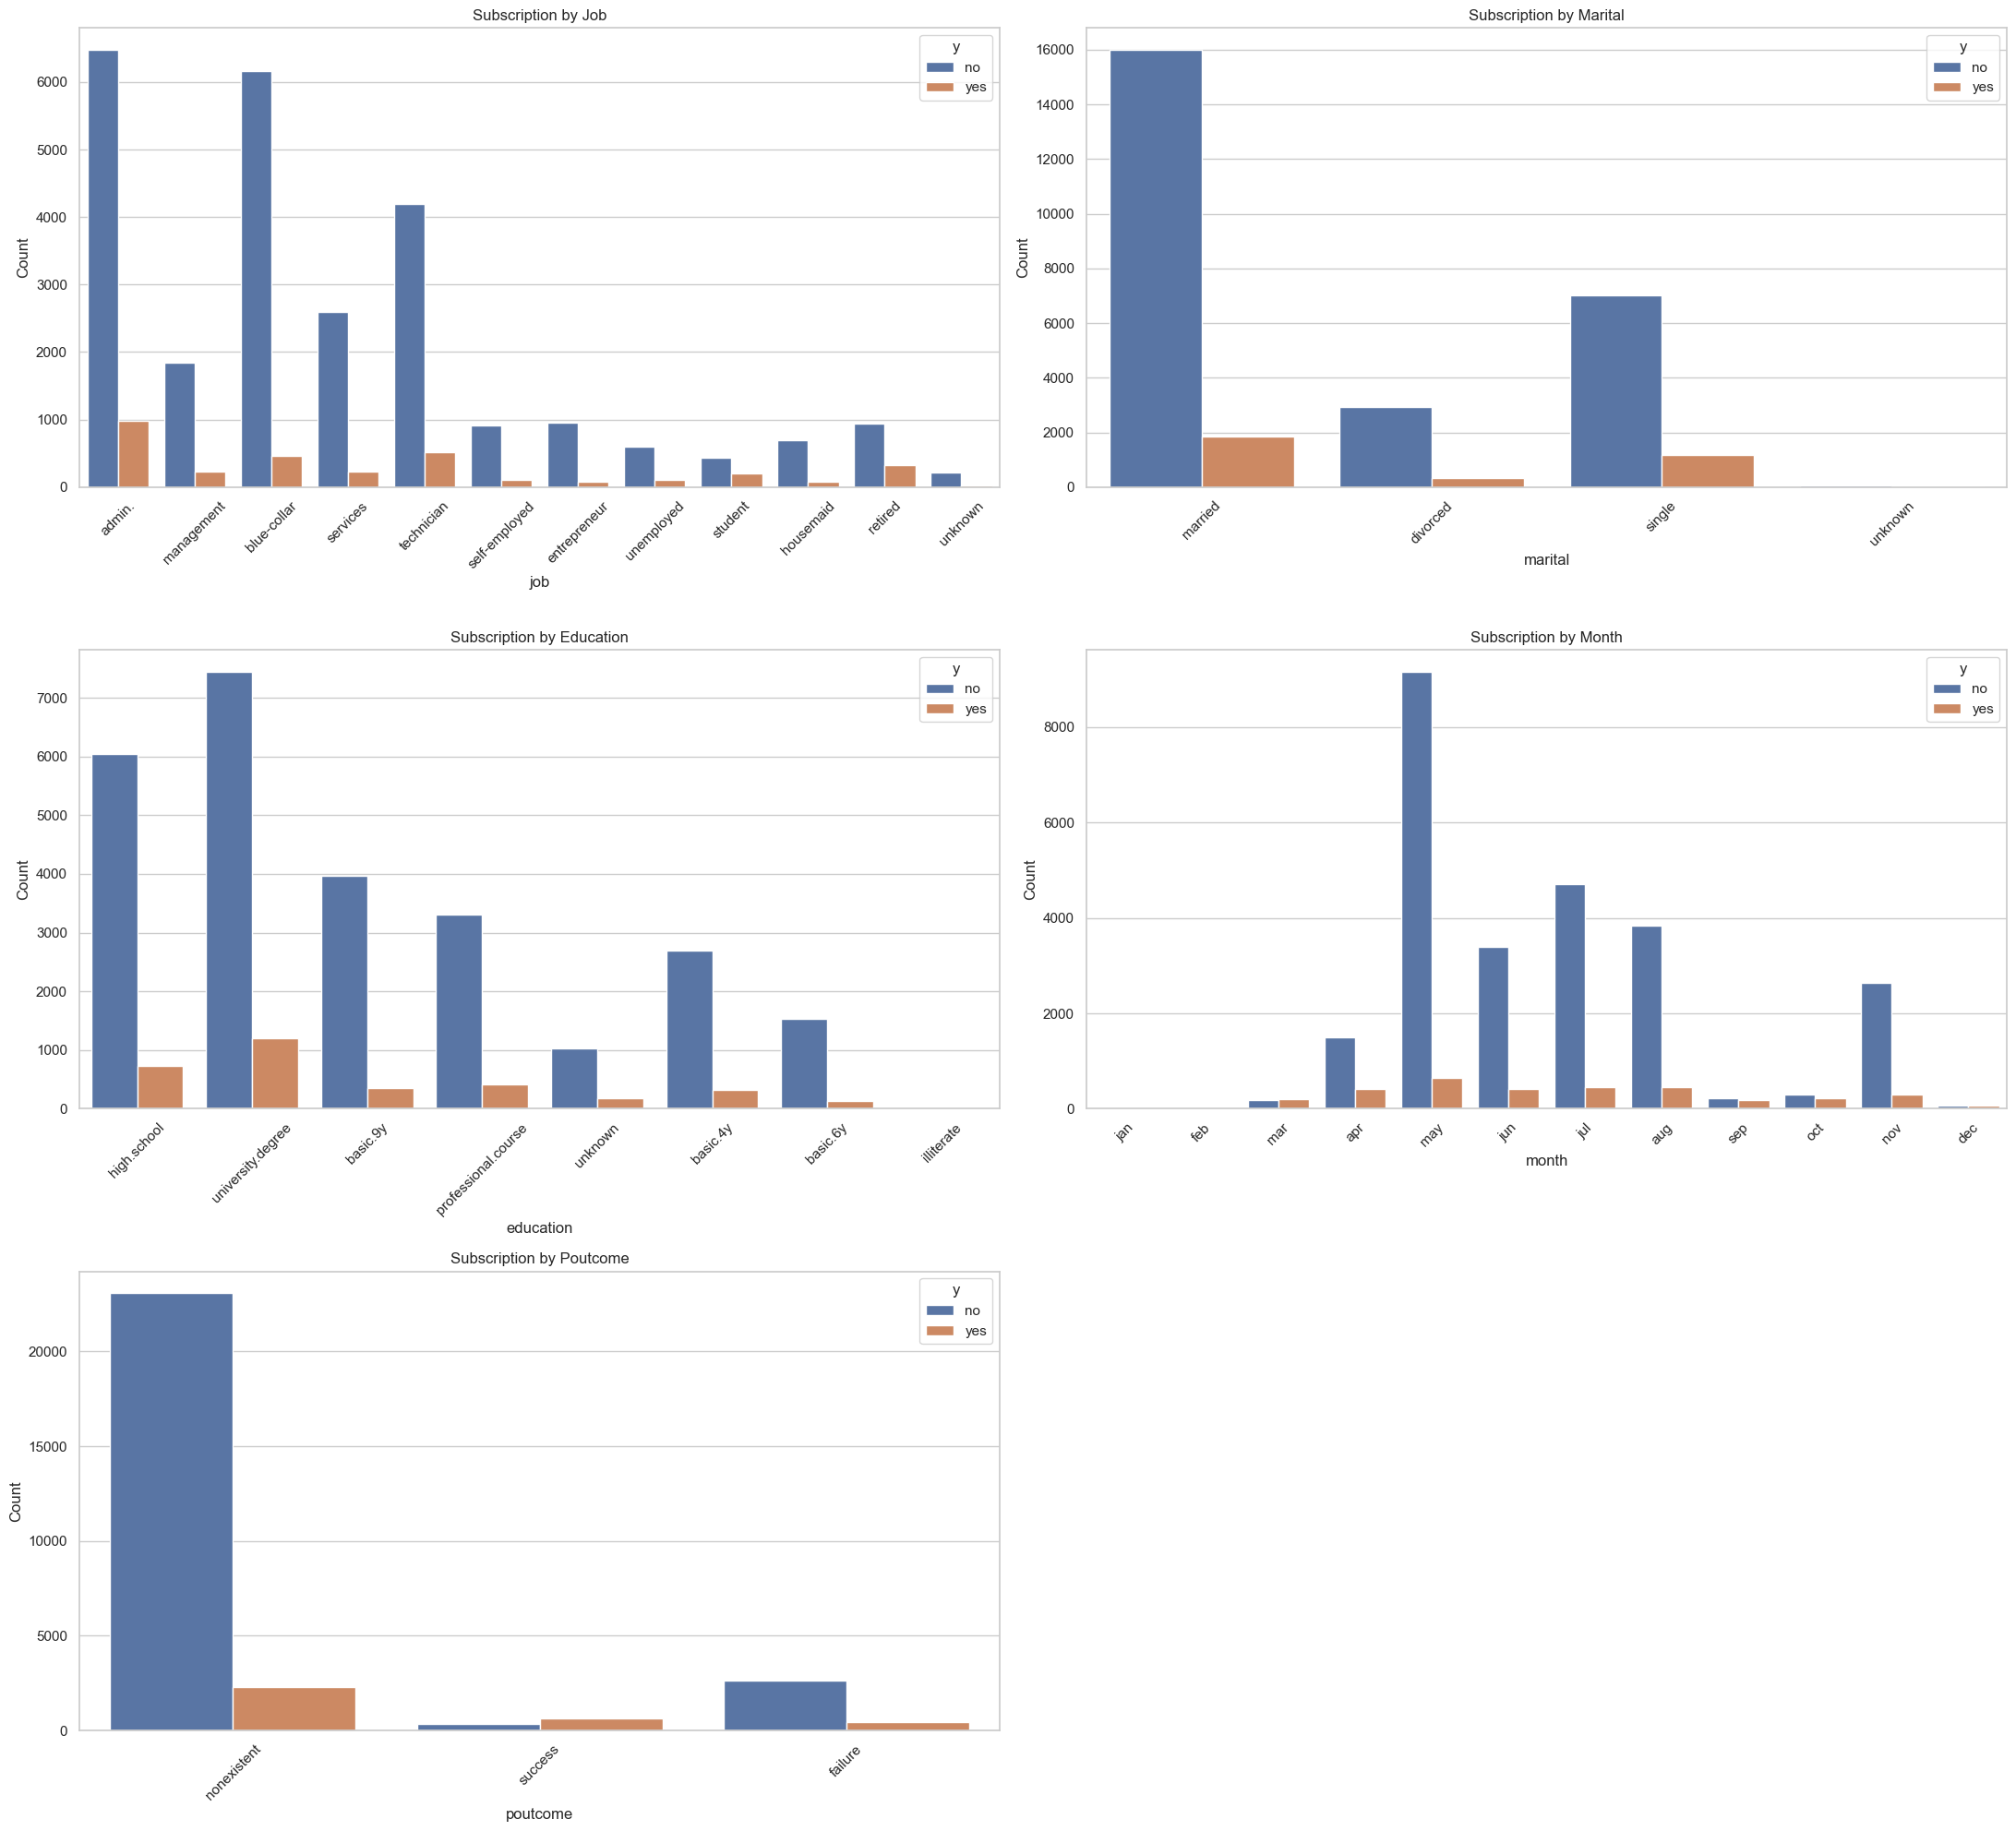

In [8]:
# Plot multiple categorical variables against target 'y' 

# List of categorical variables
categorical_vars = ['job', 'marital', 'education', 'month', 'poutcome']

# Custom chronological order for the 'month' variable
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
               'jul', 'aug', 'sep', 'oct', 'nov', 'dec']

# Create figure with subplots: 3 columns per row
n_cols = 2
n_rows = (len(categorical_vars) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(22, 20))
axes = axes.flatten()

# Plot each categorical variable
for idx, col in enumerate(categorical_vars):
    if col == 'month':
        sns.countplot(data=train_df, x=col, hue='y', ax=axes[idx], order=month_order)
    else:
        sns.countplot(data=train_df, x=col, hue='y', ax=axes[idx])

    axes[idx].set_title(f'Subscription by {col.capitalize()}')
    axes[idx].set_xlabel(col)
    axes[idx].set_ylabel('Count')
    axes[idx].tick_params(axis='x', rotation=45)

# Delete empty subplots if there are any leftovers
for i in range(len(categorical_vars), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
# Summary table of 'yes', 'no', and proportions by category

var = 'job'

# Create cross table
counts = pd.crosstab(train_df[var], train_df['y'])

# Calculate total
counts['total'] = counts.sum(axis=1)

# Calculate % of yes and no
counts['yes_%'] = round((counts['yes'] / counts['total']) * 100, 2)
counts['no_%'] = round((counts['no'] / counts['total']) * 100, 2)

# Reorder columns
summary = counts[['no', 'yes', 'total', 'no_%', 'yes_%']].sort_values('yes_%', ascending=False)

# Show
print(f"\nSubscription breakdown by {var.capitalize()}:")
display(summary)


Subscription breakdown by Job:


y,no,yes,total,no_%,yes_%
job,,,,,
student,435,197,632,68.83,31.17
retired,935,328,1263,74.03,25.97
unemployed,601,106,707,85.01,14.99
admin.,6475,976,7451,86.90,13.10
unknown,219,28,247,88.66,11.34
management,1847,232,2079,88.84,11.16
technician,4194,521,4715,88.95,11.05
self-employed,912,110,1022,89.24,10.76
housemaid,699,83,782,89.39,10.61


#### Analysis of Job

The job categories that received the highest number of campaign contacts were blue-collar, technician, and admin., making them the primary operational focus of the marketing efforts.

Despite this, these groups showed relatively low subscription rates:

* blue-collar: 6.90%

* technician: 9.71%

* admin.: 13.10%

In contrast, categories such as student (31.17%) and retired (25.97%) had the highest subscription rates, but with considerably fewer contacts (632 and 1,270 respectively), which limits their scalability and statistical stability.

**Conclusion:** The bulk of campaign resources were directed toward blue-collar, technician, and admin. clients, but their conversion rates remain modest. While smaller segments like students and retirees are more responsive, their limited size reduces their impact on overall campaign performance. Strategic adjustments may be needed to balance volume with responsiveness.

In [10]:
# Summary table of 'yes', 'no', and proportions by category

var = 'marital'

# Create cross table
counts = pd.crosstab(train_df[var], train_df['y'])

# Calculate total
counts['total'] = counts.sum(axis=1)

# Calculate % of yes and no
counts['yes_%'] = round((counts['yes'] / counts['total']) * 100, 2)
counts['no_%'] = round((counts['no'] / counts['total']) * 100, 2)

# Reorder columns
summary = counts[['no', 'yes', 'total', 'no_%', 'yes_%']].sort_values('yes_%', ascending=False)

# Show
print(f"\nSubscription breakdown by {var.capitalize()}:")
display(summary)


Subscription breakdown by Marital:


y,no,yes,total,no_%,yes_%
marital,,,,,
unknown,51,10,61,83.61,16.39
single,7031,1175,8206,85.68,14.32
married,15991,1844,17835,89.66,10.34
divorced,2946,322,3268,90.15,9.85


#### Analysis of Marital Status

* The majority of contacts were with married clients (~18,000), who had a relatively low subscription rate (10.34%).

* Single clients had a higher conversion rate (14.32%) and a moderate group size (~7,400), making them a segment worth noting.

* The unknown category showed a high rate (16.39%) but includes only 61 cases, which limits its reliability.

**Conclusion:** Among substantial groups, single clients show better relative engagement with the campaign compared to married or divorced individuals.


In [11]:
# Summary table of 'yes', 'no', and proportions by category

var =  'education'

# Create cross table
counts = pd.crosstab(train_df[var], train_df['y'])

# Calculate total
counts['total'] = counts.sum(axis=1)

# Calculate % of yes and no
counts['yes_%'] = round((counts['yes'] / counts['total']) * 100, 2)
counts['no_%'] = round((counts['no'] / counts['total']) * 100, 2)

# Reorder columns
summary = counts[['no', 'yes', 'total', 'no_%', 'yes_%']].sort_values('yes_%', ascending=False)

# Show
print(f"\nSubscription breakdown by {var.capitalize()}:")
display(summary)


Subscription breakdown by Education:


y,no,yes,total,no_%,yes_%
education,,,,,
unknown,1032,187,1219,84.66,15.34
university.degree,7444,1207,8651,86.05,13.95
professional.course,3303,418,3721,88.77,11.23
illiterate,8,1,9,88.89,11.11
high.school,6049,737,6786,89.14,10.86
basic.4y,2692,316,3008,89.49,10.51
basic.6y,1530,138,1668,91.73,8.27
basic.9y,3961,347,4308,91.95,8.05


#### Analysis of Education

* The most frequently contacted groups were high school, basic.9y, and university.degree — these account for the bulk of campaign volume.

* Higher education levels, such as university.degree (13.95%) and professional.course (11.23%), tend to show higher subscription rates than basic levels.

* The illiterate and unknown categories showed higher rates, but both have small sample sizes, which limits the comparability.

**Conclusion:** Subscription likelihood generally increases with education level, though conclusions from small groups should be interpreted cautiously.

In [12]:
# Summary table of 'yes', 'no', and proportions by category

var = 'month'  # Change this to any categorical variable

# Create cross table
counts = pd.crosstab(train_df[var], train_df['y'])

# Calculate total
counts['total'] = counts.sum(axis=1)

# Calculate % of yes and no
counts['yes_%'] = round((counts['yes'] / counts['total']) * 100, 2)
counts['no_%'] = round((counts['no'] / counts['total']) * 100, 2)

# Reorder columns
summary = counts[['no', 'yes', 'total', 'no_%', 'yes_%']]

# If the variable is 'month', apply chronological order
if var == 'month':
    month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun',
                   'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
    summary.index = pd.CategoricalIndex(summary.index, categories=month_order, ordered=True)
    summary = summary.sort_index()

else:
    # sort by highest yes percentage
    summary = summary.sort_values('yes_%', ascending=False)

# Show results
print(f"\nSubscription breakdown by {var.capitalize()}:")
display(summary)


Subscription breakdown by Month:


y,no,yes,total,no_%,yes_%
month,,,,,
mar,191,199,390,48.97,51.03
apr,1501,407,1908,78.67,21.33
may,9165,644,9809,93.43,6.57
jun,3400,415,3815,89.12,10.88
jul,4706,455,5161,91.18,8.82
aug,3847,461,4308,89.30,10.70
sep,215,183,398,54.02,45.98
oct,292,224,516,56.59,43.41
nov,2637,292,2929,90.03,9.97


#### Analysis of Month

* The highest number of contacts occurred in May, followed by July and August; however, these months had low subscription rates (6–11%).

* In contrast, months like December (52.21%), March (51.03%), September (45.98%), and October (43.41%) show much higher subscription rates despite lower contact volumes.

* These patterns suggest that timing plays a significant role in campaign effectiveness.

**Conclusion:** Months with fewer contacts (such as December and March) resulted in significantly higher conversion rates. Further analysis is needed to determine whether external factors, seasonality, or campaign targeting explain this outcome.

#### Distribution & Outlier Review

Histograms and boxplots were used to explore the distribution and detect extreme values in key numeric variables. Some variables show strong skewness or outliers (e.g., campaign, duration, pdays = 999). These observations are important to consider in modeling and clustering stages.

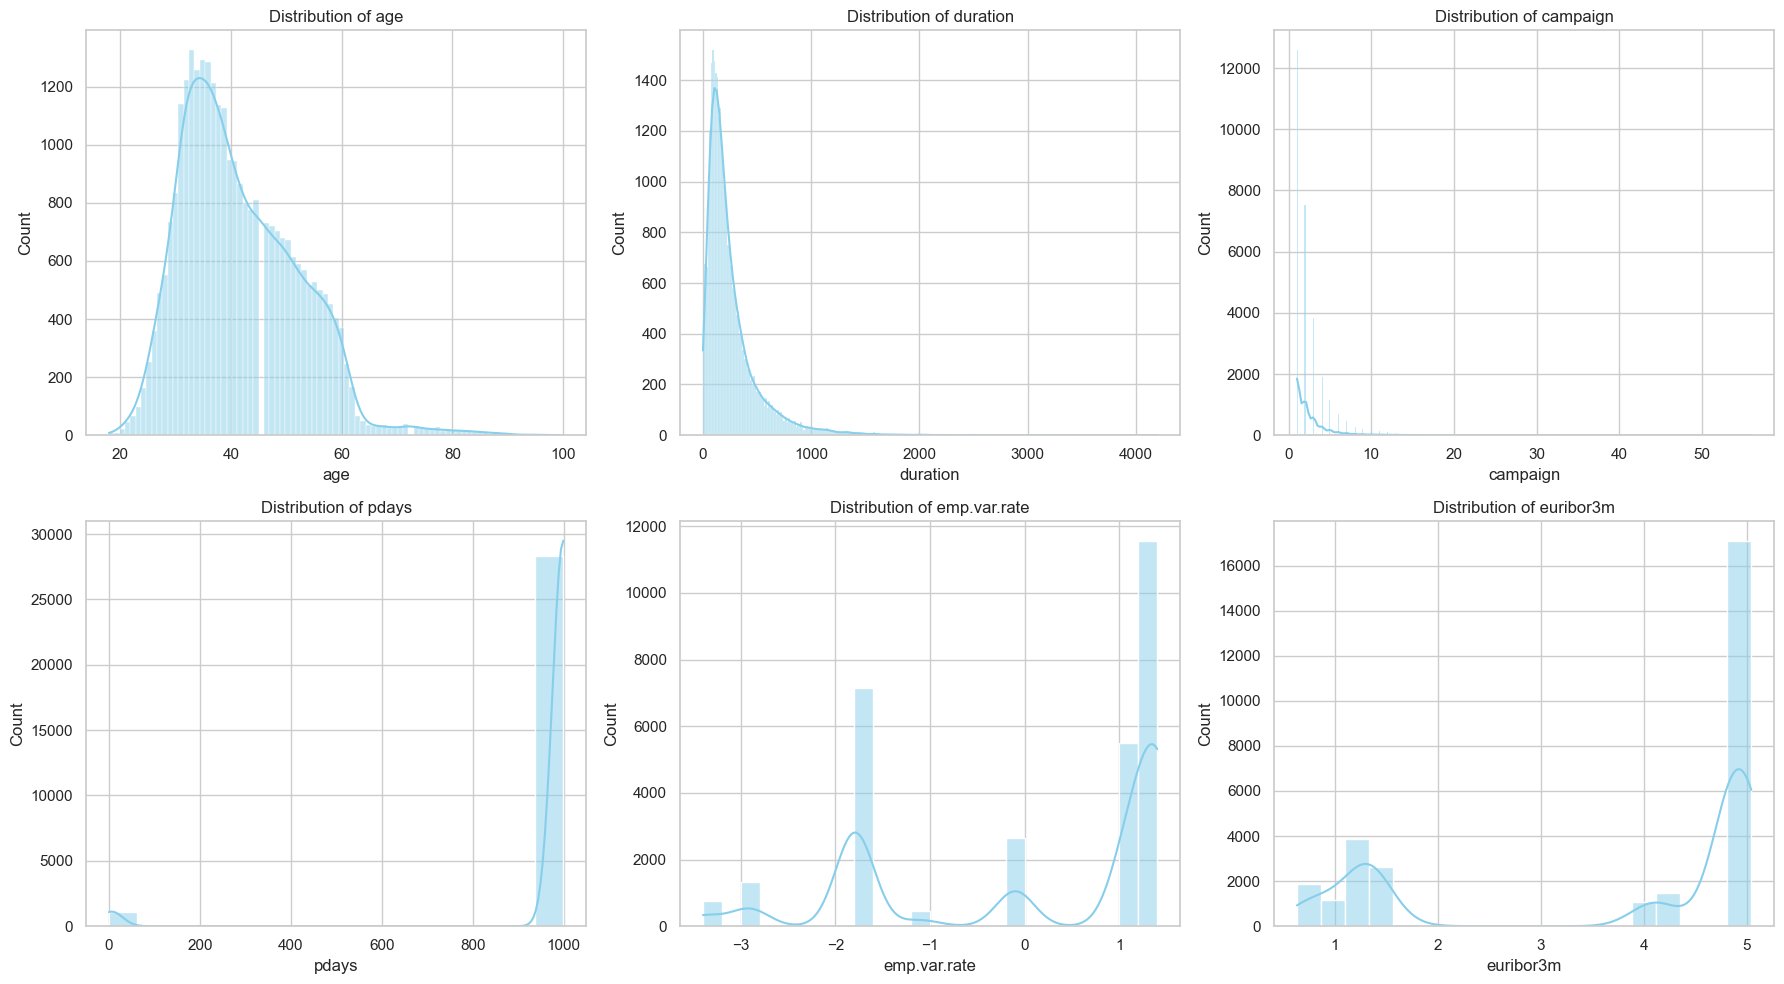

In [13]:
# Review distribution and detect outliers in key numeric variables

# Select numeric variables to review
numeric_vars = ['age', 'duration', 'campaign', 'pdays', 'emp.var.rate', 'euribor3m']

# Set up subplots
n_cols = 3
n_rows = (len(numeric_vars) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

# Plot distribution and boxplot for each variable
for i, var in enumerate(numeric_vars):
    sns.histplot(train_df[var], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribution of {var}')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

##### Distribution Analysis – Key Highlights

- **age:** The distribution is right-skewed, concentrated between ages 30 and 50. Very few clients are under 25 or over 70.

- **duration:** Highly skewed with most calls lasting under 500 seconds. A few extreme cases exceed 3,000 seconds, which could bias models if not handled properly.

- **campaign:** Most clients were contacted only once or twice. However, there are extreme values above 30 and up to 50+, indicating potential outliers.

- **pdays:** The vast majority of values are 999, which indicates clients who had not been contacted previously. This skews the distribution heavily and confirms that pdays is not normally distributed.

- **emp.var.rate and euribor3m:** Both variables show multi-modal distributions with spikes around specific economic levels. These variables reflect macroeconomic context rather than client behavior and will likely need scaling.

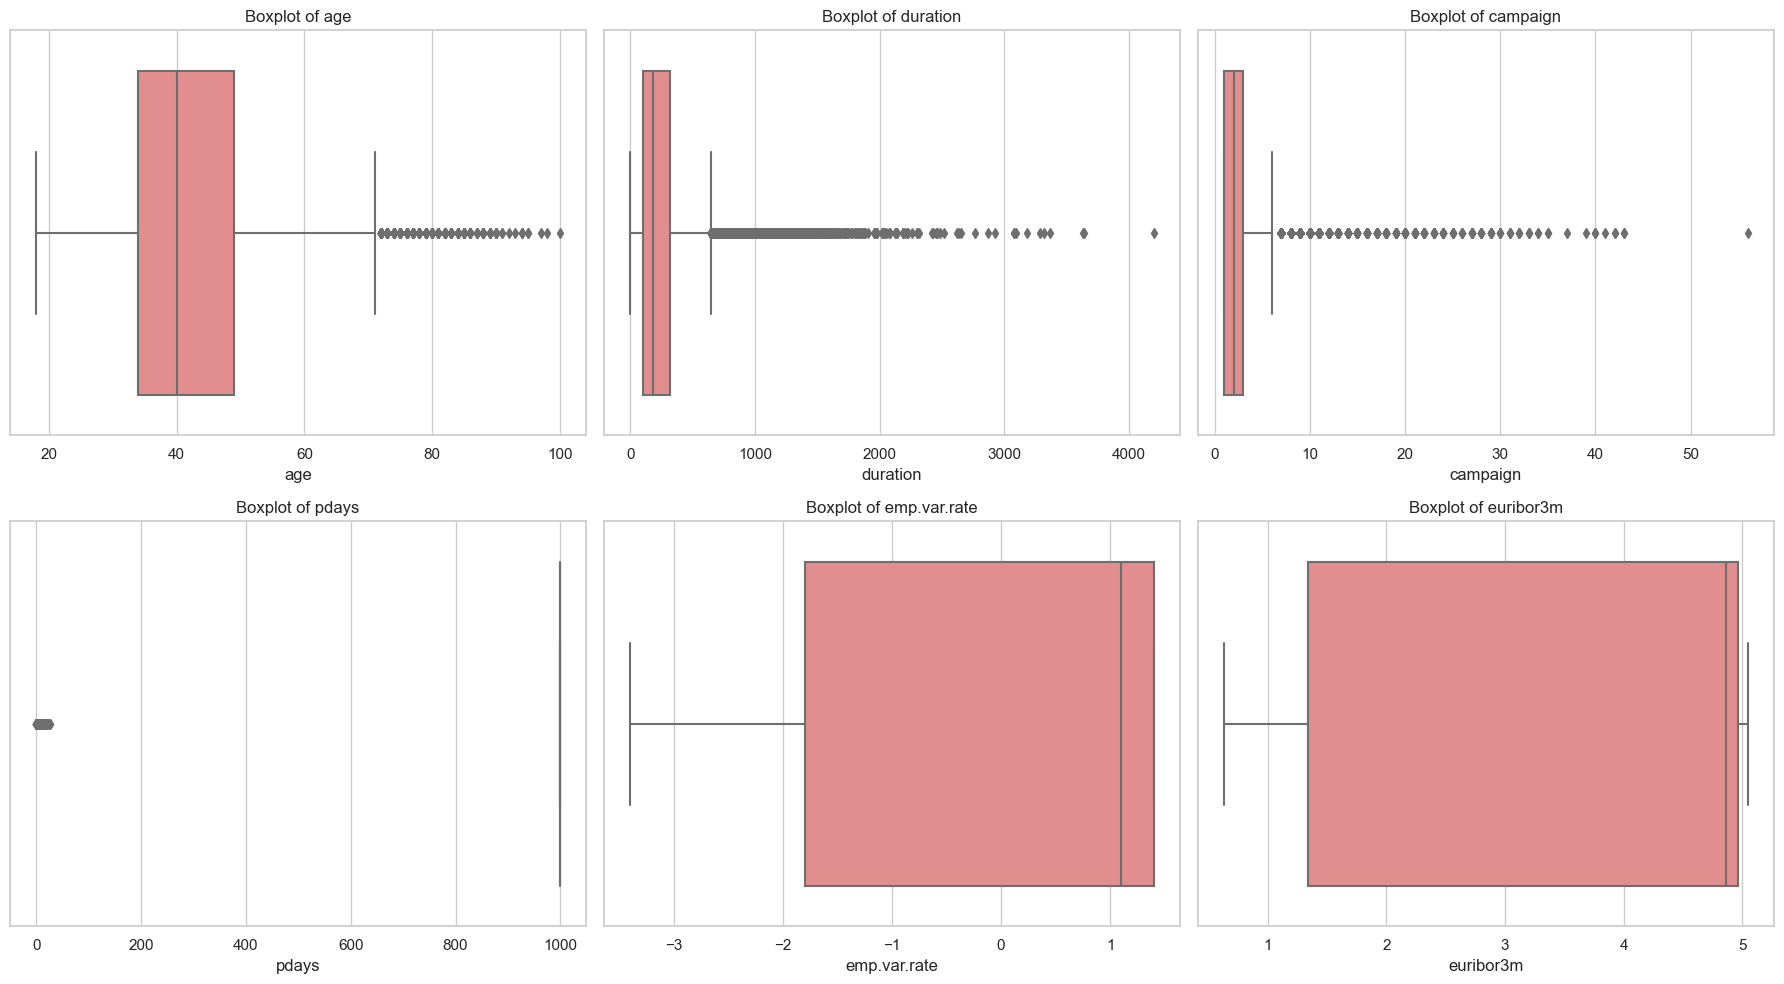

In [14]:
# boxplots to highlight outliers
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 10))
axes = axes.flatten()

for i, var in enumerate(numeric_vars):
    sns.boxplot(x=train_df[var], ax=axes[i], color='lightcoral')
    axes[i].set_title(f'Boxplot of {var}')
    axes[i].set_xlabel(var)

plt.tight_layout()
plt.show()

##### Outlier Detection – Boxplot Analysis

- **age:** The distribution is moderately right-skewed. Most clients are between 30 and 60 years old. Values above 70 are considered outliers, though they are relatively few.

- **duration:** There is a substantial number of extreme values beyond 1,000 seconds, with several points exceeding 3,000. These outliers may impact model performance and will be excluded from modeling as this variable is only known after contact.

- **campaign:** Most clients were contacted fewer than 5 times, but there are several extreme cases above 20 and up to 50+ calls. These values are operationally uncommon and should be flagged for further consideration.

- **pdays:** The vast majority of values are either 999 or near 0, with a sharp gap in between. These spikes reflect the design of the variable (999 = not previously contacted), not typical outliers.

- **emp.var.rate and euribor3m:** Although a few mild outliers exist, the distributions are generally well-contained. These economic indicators show broader variability but no critical outlier risk.



## 6. Data Cleaning and Transformation

##### 1. Variable Removal

- **ID:** Removed because it’s only a row identifier and carries no predictive value.

- **duration:** Although strongly correlated with the target variable, this value is only known after the contact is made. Including it would introduce data leakage.

In [15]:
# Drop columns that should not be used in modeling

# 'ID' is a unique identifier and carries no predictive information
# 'duration' is only known after the call and would cause data leakage
train_df_cleaned = train_df.drop(columns=['ID', 'duration'])

# Confirm changes
print("Remaining columns after removing 'ID' and 'duration':")
print(train_df_cleaned.columns.tolist())

Remaining columns after removing 'ID' and 'duration':
['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'y']


##### 2. Handling Special Values (e.g., 'unknown' and 999)

- Categorical variables such as job, marital, education, default, housing, and loan contain the value 'unknown'.
These will be retained as a separate category, as removing them would reduce the dataset unnecessarily.

- pdays:

  - Value 999 means the client was not contacted previously.

  - We will create a new binary feature contacted_before to capture this meaning (1 if pdays != 999, 0 otherwise).

  - The original pdays will be kept as-is for now.



In [16]:
# Review how many 'unknown' values are present in key categorical variables
unknown_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan']

for col in unknown_cols:
    unknown_count = train_df_cleaned[col].value_counts().get('unknown', 0)
    print(f"'{col}': {unknown_count} 'unknown' values")

# We will keep 'unknown' as a valid category (no replacements)

# Handle special case in 'pdays':
# Create a binary feature: 'contacted_before' (1 if client was contacted before, 0 otherwise)
train_df_cleaned['contacted_before'] = train_df_cleaned['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Confirm creation
print("\nValue counts for 'contacted_before':")
print(train_df_cleaned['contacted_before'].value_counts())

'job': 247 'unknown' values
'marital': 61 'unknown' values
'education': 1219 'unknown' values
'default': 6116 'unknown' values
'housing': 708 'unknown' values
'loan': 708 'unknown' values

Value counts for 'contacted_before':
contacted_before
0    28289
1     1081
Name: count, dtype: int64


##### 3. Encoding Categorical Variables

- For modeling, we will apply Label Encoding to the binary target y (yes = 1, no = 0).

- For clustering and modeling:

  - Categorical features will be converted using One-Hot Encoding, as required by algorithms like K-Means.

  - This will increase dimensionality but allows proper distance calculations.

In [17]:
# Encode the target variable 'y': 'yes' → 1, 'no' → 0
label_encoder = LabelEncoder()
train_df_cleaned['y'] = label_encoder.fit_transform(train_df_cleaned['y'])

# Confirm encoding
print("\nEncoded target variable 'y':")
print(train_df_cleaned['y'].value_counts())

# One-Hot Encode all categorical variables (excluding the target and numerical)
categorical_cols = train_df_cleaned.select_dtypes(include='object').columns.tolist()

# Apply one-hot encoding to categorical variables
train_df_encoded = pd.get_dummies(train_df_cleaned, columns=categorical_cols, drop_first=True)

# Confirm shape after encoding
print(f"\nShape after one-hot encoding: {train_df_encoded.shape}")


Encoded target variable 'y':
y
0    26019
1     3351
Name: count, dtype: int64

Shape after one-hot encoding: (29370, 54)


##### 4. Feature Scaling

- Numerical features vary significantly in scale (e.g., age vs. campaign vs. euribor3m).

- We will apply StandardScaler to numerical variables when preparing the data for K-Means clustering.

In [18]:
# Select numerical columns to scale (excluding the target 'y')
# Keep only variables that are continuous or count-based
numeric_cols = ['age', 'campaign', 'pdays', 'previous',
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                'euribor3m', 'nr.employed']

# Initialize the scaler
scaler = StandardScaler()

# Fit and transform the numeric features
train_df_encoded[numeric_cols] = scaler.fit_transform(train_df_encoded[numeric_cols])

# Confirm result
print("\nSample of scaled numeric features:")
display(train_df_encoded[numeric_cols].head())


Sample of scaled numeric features:


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,0.042382,0.515095,0.195479,-0.350039,0.650189,0.721026,0.892716,0.714576,0.333088
1,1.750241,2.671256,0.195479,-0.350039,0.840983,-0.227239,0.957509,0.776801,0.846871
2,1.086074,0.155735,0.195479,-0.350039,-1.194146,-0.863439,-1.418210,-1.231664,-0.939596
3,-0.052500,-0.562985,-5.099504,5.720019,-0.748962,1.074470,0.655145,-1.577354,-2.816078
4,0.801430,-0.562985,0.195479,-0.350039,0.650189,0.721026,0.892716,0.714000,0.333088


- **Note:** Outliers were identified and reviewed during the exploratory analysis, but no values were removed. Although the case did not specify which classification model to use, I intend to apply Random Forest due to its robustness to outliers, ability to handle mixed data types, and suitability for imbalanced classification tasks. Since Random Forest does not rely on distance metrics and is not sensitive to extreme values, no additional outlier treatment was considered necessary. Additionally, standard scaling was applied prior to clustering to prepare the data for K-Means.

## 7. Classification Model – Predict if client will subscribe

The objective of this section is to train a classification model that can predict whether a client will subscribe to a term deposit (y = yes). Given that the dataset is imbalanced, we will experiment with two approaches:

- **Random Forest with Class Weights:** A simple way to penalize misclassification of the minority class.

- **Random Forest with SMOTE Oversampling:** A resampling technique that synthetically generates additional “yes” records to balance the training set.

We will compare the results using performance metrics such as accuracy, precision, recall, F1-score, and the confusion matrix.

**7.2 Train-Test Split**

We split the dataset into training and testing sets to evaluate model performance on unseen data. The target variable is y.

In [19]:
# Separate features and target variable
X = train_df_encoded.drop('y', axis=1)
y = train_df_encoded['y']

# Train-test split (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

# Confirm the class distribution
print("Target distribution in training set:")
print(y_train.value_counts(normalize=True))

Target distribution in training set:
y
0    0.885895
1    0.114105
Name: proportion, dtype: float64


The target variable is highly imbalanced, with fewer than 12% of the clients subscribing to the term deposit. This imbalance is consistent with what was observed during the EDA and confirms that:

- A regular classifier would likely favor class 0 (No) just to maximize accuracy.

- Metrics like recall and F1-score for the “Yes” class will be much more meaningful than accuracy.

- Techniques such as SMOTE or class weighting are essential in this case to avoid biased predictions.

**7.2. First Model: Random Forest with Class Weights**

Before applying any data balancing techniques like SMOTE, it's best practice to try using a model with built-in support for imbalanced data. Random Forest allows us to set class_weight='balanced', which adjusts weights inversely proportional to class frequencies.


In [20]:
# Initialize model with class_weight
rf_balanced = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)

# Fit model
rf_balanced.fit(X_train, y_train)

# Predict
y_pred_balanced = rf_balanced.predict(X_test)

# Evaluate
print("Classification Report - Random Forest with class_weight='balanced':")
print(classification_report(y_test, y_pred_balanced, target_names=['No', 'Yes']))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_balanced)
print("Confusion Matrix:")
print(cm)

Classification Report - Random Forest with class_weight='balanced':
              precision    recall  f1-score   support

          No       0.91      0.97      0.94      5204
         Yes       0.56      0.26      0.36       670

    accuracy                           0.89      5874
   macro avg       0.73      0.62      0.65      5874
weighted avg       0.87      0.89      0.87      5874

Confusion Matrix:
[[5064  140]
 [ 494  176]]


This is the performance of the first classification model using Random Forest with class weighting to address imbalance.

- **Precision:** 0.56 → Over half of the predicted "Yes" were correct.

- **Recall:** 0.26 → Only 26% of actual "Yes" cases were detected.

- **F1-score:** 0.36 → Low balance between precision and recall.

- **Accuracy:** 0.89 → Looks high, but misleading due to imbalance.


While using class_weight='balanced' slightly improved fairness, the model still strongly favors the majority class (No).
This confirms that weighting alone is not sufficient for this level of imbalance.

Next steps like SMOTE (oversampling) are justified and necessary to improve recall for the minority class.

**7.3. Second Model: Random Forest with SMOTE Oversampling**

Although class_weight helps, it may not be enough if the minority class is too underrepresented. SMOTE (Synthetic Minority Oversampling Technique) helps by generating artificial “yes” cases in the training set.

In [21]:
# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Confirm new class distribution
print("Class distribution after SMOTE:")
print(y_train_smote.value_counts())

# Train a new model on the resampled data
rf_smote = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_smote.fit(X_train_smote, y_train_smote)

# Predict
y_pred_smote = rf_smote.predict(X_test)

# Evaluate
print("Classification Report - Random Forest with SMOTE:")
print(classification_report(y_test, y_pred_smote, target_names=['No', 'Yes']))

# Confusion Matrix
cm_smote = confusion_matrix(y_test, y_pred_smote)
print("Confusion Matrix:")
print(cm_smote)

Class distribution after SMOTE:
y
0    20815
1    20815
Name: count, dtype: int64
Classification Report - Random Forest with SMOTE:
              precision    recall  f1-score   support

          No       0.92      0.94      0.93      5204
         Yes       0.46      0.37      0.41       670

    accuracy                           0.88      5874
   macro avg       0.69      0.66      0.67      5874
weighted avg       0.87      0.88      0.87      5874

Confusion Matrix:
[[4908  296]
 [ 419  251]]


This model was trained on a fully balanced dataset (after applying SMOTE), where both classes now have 20,815 records each.

**Precision:** 0.46 → Slightly lower than with class weights, but still usable.

**Recall:** 0.37 → Improved from 0.26 (previous model).

 **F1-score:** 0.41 → Also improved vs. 0.36 in the class-weighted model.
 
**Accuracy:** 0.88 → Slight drop, but expected when recall improves.
    
- SMOTE successfully improved recall and F1-score for the minority class (Yes).

- There’s a small trade-off in overall accuracy and precision, but this is acceptable for a marketing context, where detecting more true subscribers is a priority.

- This version is more effective than class weights alone and justifies the use of synthetic oversampling.

- Although SMOTE helped rebalance the training data and improved recall slightly, the model still struggles to detect all positive cases. To address this, we will adjust the decision threshold to capture more true positives.

**7.4. Third Model: Random Forest with SMOTE + Threshold Adjustment**

Although SMOTE improved the model's ability to detect positive cases, recall for the 'Yes' class remained relatively low. Therefore, we are going to adjust the classification threshold to further boost recall.

In [22]:
# Adjust decision threshold to improve recall on the 'Yes' class

# Get predicted probabilities (only for class 1)
y_proba = rf_smote.predict_proba(X_test)[:, 1]

# Set custom threshold
threshold = 0.35
y_pred_adjusted = (y_proba >= threshold).astype(int)

# Evaluate new predictions
print(f"\nClassification Report – Random Forest with SMOTE (Threshold = {threshold}):")
print(classification_report(y_test, y_pred_adjusted, target_names=['No', 'Yes']))

# Confusion matrix
cm_adjusted = confusion_matrix(y_test, y_pred_adjusted)
print("Confusion Matrix:")
print(cm_adjusted)


Classification Report – Random Forest with SMOTE (Threshold = 0.35):
              precision    recall  f1-score   support

          No       0.94      0.89      0.91      5204
         Yes       0.39      0.54      0.45       670

    accuracy                           0.85      5874
   macro avg       0.66      0.71      0.68      5874
weighted avg       0.87      0.85      0.86      5874

Confusion Matrix:
[[4634  570]
 [ 310  360]]


This model combines two techniques: **SMOTE** to rebalance the training data and **Threshold tuning** to favor identifying more clients who say “Yes.”

- **Precision:** 0.39 → Slightly decreased (more false positives).

- **Recall:** 0.54 → Significant improvement (from 0.26 initially).

- **F1-score:** 0.45 → Highest achieved so far.

- **Accuracy:** 0.85 → Slight drop, but acceptable given the recall gain.
    
* Lowering the decision threshold to 0.35 after SMOTE offers the best trade-off between capturing actual "Yes" clients and maintaining model reliability.

* This approach is well-suited for marketing applications, where failing to identify a potential subscriber is more costly than targeting someone who ultimately says "No."

Although the overall accuracy is 0.85, this metric is not the most informative in imbalanced classification problems.
Our goal was to enhance the model's ability to detect the minority class (clients who subscribe), and we successfully increased recall from 26% to 54%.
This improvement significantly enhances the campaign's ability to target and engage high-potential leads more effectively.

## 8. Client Segmentation – K-Means Clustering

##### 8.1. Feature Selection for Clustering:

To perform K-Means clustering, we will select client-related features that reflect demographic, financial, and behavioral characteristics. 
Variables tied to outcomes—such as the target variable (y) and previous campaign results (poutcome_*)—will be excluded to avoid introducing bias into the segmentation process.

In [23]:
# Make a copy of the encoded dataset
clustering_df = train_df_encoded.copy()

# Define columns to exclude from clustering
cols_to_exclude = ['y'] + [col for col in clustering_df.columns if col.startswith('poutcome_')]

# Drop excluded columns
X_clustering = clustering_df.drop(columns=cols_to_exclude)

# Confirm dimensions
print(f"Clustering dataset shape: {X_clustering.shape}")

Clustering dataset shape: (29370, 51)


##### 8.2. Determining the Optimal Number of Clusters (Elbow Method)

K-Means requires us to predefine the number of clusters (k). To identify an appropriate value, we apply the Elbow Method, which evaluates the Within-Cluster Sum of Squares (WCSS) for different values of k.

The optimal k is typically the point where the WCSS curve starts to flatten—known as the "elbow"—indicating that adding more clusters yields diminishing returns.

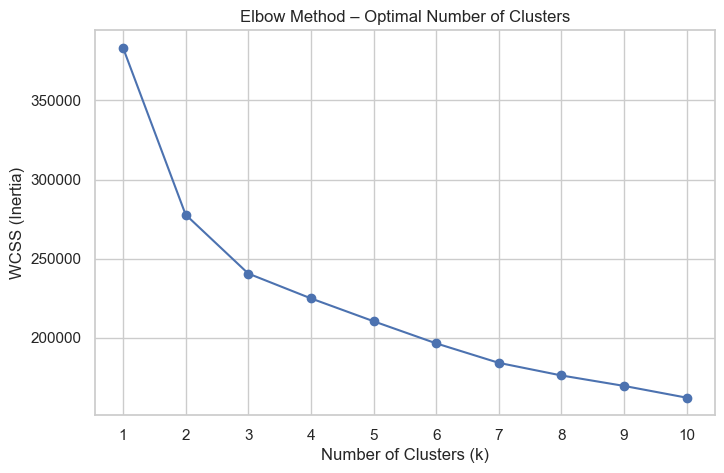

In [24]:
# Calculate WCSS for different values of k
wcss = []
k_values = range(1, 11)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_clustering)
    wcss.append(kmeans.inertia_)  # Inertia = total within-cluster sum of squares

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o')
plt.title('Elbow Method – Optimal Number of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.xticks(k_values)
plt.grid(True)
plt.show()

Looking at the elbow curve, we can observe a sharp drop in WCSS between k = 1 and k = 3, after which the rate of improvement slows down significantly. The "elbow" appears to occur around k = 3 or k = 4, suggesting that adding more clusters beyond this point yields diminishing returns in terms of variance explained.

**Conclusion:** We will proceed with k = 4 as the optimal number of clusters, balancing performance and interpretability.

##### 8.3. Apply K-Means Clustering

Based on the Elbow Method, we will apply K-Means using k = 4 to segment the clients into four distinct groups. The resulting cluster assignments will be added to the dataset for further profiling and visualization.

In [25]:
# Apply K-Means with the selected number of clusters
kmeans_final = KMeans(n_clusters=4, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_clustering)

# Add cluster assignments to the dataset
train_df_encoded['cluster'] = cluster_labels

# Confirm distribution of clients across clusters
print("Number of clients in each cluster:")
print(train_df_encoded['cluster'].value_counts().sort_index())

Number of clients in each cluster:
cluster
0     8592
1     1091
2     1115
3    18572
Name: count, dtype: int64


After applying K-Means with k = 4, the dataset was segmented into four distinct client clusters. The distribution of clients across clusters is uneven, with Cluster 3 containing the majority of clients:

- **Cluster 3:** 18,572 clients (≈ 63%)

- **Cluster 0:** 8,592 clients (≈ 29%)

- **Clusters 1 and 2:** ~1,100 clients each (≈ 4% each)

This imbalance suggests that some clusters represent broader population groups, while others may reflect more specific or niche profiles. The next steps will focus on visualizing these clusters and conducting a profiling analysis to interpret their characteristics.

##### 8.4. Cluster Visualization Using PCA

To better understand how clients are grouped, we will apply Principal Component Analysis (PCA) to reduce the feature space to two dimensions. This allows us to visualize the clusters created by K-Means in a 2D scatter plot. Although PCA reduces some detail, it helps identify patterns and separation between clusters.

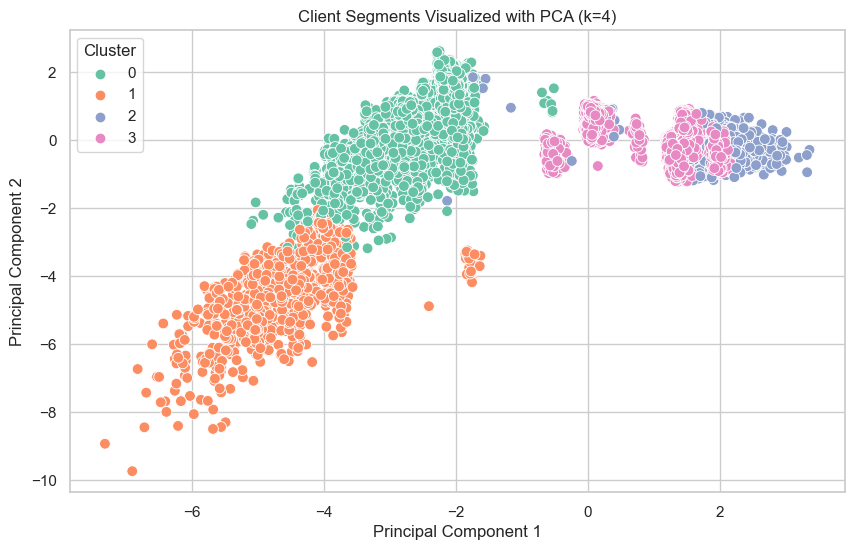

In [26]:
# Run PCA to reduce to 2 components
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(X_clustering)

# Create DataFrame for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['cluster'] = train_df_encoded['cluster']

# Plot clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='cluster', palette='Set2', s=60)
plt.title('Client Segments Visualized with PCA (k=4)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

The PCA visualization shows a reasonably good separation between the four clusters identified by K-Means. While some clusters (e.g., Cluster 1 and Cluster 0) are more distinct and spread across different regions of the space, others (e.g., Cluster 2 and Cluster 3) appear more compact and localized. This suggests that K-Means was able to capture meaningful differences between client segments, which will be further explored in the next step through cluster profiling.

##### 8.5. Cluster Profiling

After assigning each client to a cluster, we now analyze the characteristics of each group. This includes comparing demographic, financial, and behavioral variables across clusters. The goal is to generate clear profiles that describe the typical client in each segment and potentially guide marketing or product strategies.

In [27]:
# Group by cluster and calculate mean values for all features
cluster_profiles = train_df_encoded.groupby('cluster').mean().round(2)

# Transpose for easier viewing if needed
cluster_profiles_transposed = cluster_profiles.transpose()

# Display cluster profiles
print("Average feature values by cluster:")
display(cluster_profiles_transposed)

Average feature values by cluster:


cluster,0,1,2,3
age,-0.06,0.19,0.05,0.01
campaign,-0.17,-0.26,3.72,-0.13
pdays,0.20,-5.07,0.20,0.20
previous,0.29,3.05,-0.35,-0.29
emp.var.rate,-1.34,-1.38,0.78,0.65
cons.price.idx,-1.02,-0.40,0.66,0.45
cons.conf.idx,-0.57,0.46,0.15,0.23
euribor3m,-1.39,-1.52,0.74,0.69
nr.employed,-1.23,-1.91,0.73,0.64
y,0.20,0.64,0.04,0.05


In [28]:
# Inverse transform of numeric features to get actual (real) average values per cluster

# Define the numeric columns used in the original scaling
numeric_cols = ['age', 'campaign', 'pdays', 'previous',
                'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
                'euribor3m', 'nr.employed']

# Use the original (non-scaled) training data to refit the scaler
X_original = train_df[numeric_cols]  # 

# Refit the scaler correctly on unscaled data
scaler = StandardScaler()
scaler.fit(X_original)

# Get the standardized cluster means from encoded data
cluster_means_std = train_df_encoded.groupby('cluster')[numeric_cols].mean()

# Apply inverse transform to recover real values
cluster_means_real = pd.DataFrame(
    scaler.inverse_transform(cluster_means_std),
    columns=numeric_cols,
    index=cluster_means_std.index
)

# Show real average values per cluster
print("Average real (non-standardized) values per cluster:")
display(cluster_means_real.round(2))

Average real (non-standardized) values per cluster:


,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
cluster,,,,,,,,,
0,40.92,2.10,999.0,0.32,-2.03,92.99,-43.18,1.20,5078.02
1,43.56,1.83,15.1,1.68,-2.09,93.34,-38.38,0.98,5028.97
2,42.06,12.92,999.0,0.00,1.30,93.96,-39.85,4.90,5219.42
3,41.70,2.20,999.0,0.03,1.11,93.84,-39.47,4.81,5213.04


##### Cluster Profiling Analysis (k = 4)

**1. Cluster 0 – Moderately contacted, general population**

- **Age:** 40.9 years

- **Campaigns:** ~2.1 attempts

- **Previous contact:** Almost none (0.32)

- **pdays:** 999 (not contacted before)

- **Conversion rate (y):** 0.20 → low to moderate

**Profile:**

- **Jobs:** More likely to be blue-collar (22%), services (10%)

- **Marital:** Mostly married (55%), some single (35%)

- **Education:** Basic levels dominate (basic.9y and high school)

- **Loans:** ~57% have housing loans

- **Contact:** Mostly in May (48%), with no past campaign success

- **Economic context:** Very low emp.var.rate (-2.03) and confidence index (-43.18)

**Interpretation:** This group represents a large, middle-aged segment contacted during economically difficult periods. They had no prior engagement and low conversion, but not zero.


**Cluster 1 – High engagement, high conversion**

- **Age:** 43.6 years

- **Campaigns:** 1.8 (low)

- **Previous contact:** 1.68 (very high)

- **pdays:** 15.1 (contacted very recently)


- **Conversion rate (y):** 0.64 (highest)

**Profile:**

- **Jobs:** High presence of management, retired, self-employed

- **Marital:** Mostly married

- **Education:** 38% university degree (highest)

- **Loans:** More likely to have personal loans (16%) and housing loans (56%)

- **Contact:** Strong link to poutcome_success = 90%

- **Economic conditions:** Also difficult (emp.var.rate = -2.09), but likely re-targeted

**Interpretation:** This is a high-value cluster with strong historical engagement and conversion. These are likely warm leads, recontacted with tailored messages. Ideal for targeted campaigns.

**Cluster 2 – Aggressively contacted cold leads**

- **Age:** 42 years

- **Campaigns:** 12.9 (extremely high)

- **Previous contacts:** 0.0

- **pdays:** 999 (not contacted before)

- **Conversion rate (y):** 0.04 (very poor)

**Profile:**

- **Jobs:** Mix of blue-collar and technician

- **Marital:** Mostly married (63%)

- **Education:** Basic.9y and high school dominate

- **Loans:** 62% have housing loans

- **Contact:** High use of telephone, contacted heavily in May and July

- **Economic context:** Positive (emp.var.rate = 1.30), but results poor

**Interpretation:** This is a massive cold campaign group that received excessive contact without any prior relationship — and it failed. This cluster likely represents inefficient targeting.

**Cluster 3 – Typical new contacts under normal conditions**

- **Age:** 41.7 years

- **Campaigns:** 2.2

- **Previous contacts:** 0.03 (almost none)

- **pdays:** 999 (not contacted before)

- **Conversion rate (y):** 0.05 (slightly better than Cluster 2)

**Profile:**

- **Jobs:** Balanced, slight management and technician presence

- **Marital:** 64% married

- **Education:** Mostly high school and some university (29%)

- **Loans:** 50% have housing loans

- **Contact:** Spread across months, some presence in June and October

- **Economic context:** Neutral-positive (emp.var.rate = 1.11)

**Interpretation:** This cluster resembles the general population. Clients are new, contacted during normal periods, and may need better segmentation or personalized messaging to increase impact.

**8.6 Prediction Distribution by Cluster**

In this section, We combine the output of the classification model (predicted probability of subscription) with the clusters obtained through K-Means segmentation. This allows us to evaluate how high-probability clients are distributed across the identified client segments.

By doing so, We can identify which clusters contain the majority of clients likely to subscribe, detect hidden opportunities, and validate if our clustering structure aligns with the predictive model’s outcome.

In [29]:
# 1. Generate probability predictions on the full dataset
y_proba_full = rf_smote.predict_proba(X)[:, 1]  # probability of class 'yes'

# 2. Add predicted probabilities to the main dataset
train_df_encoded['y_proba'] = y_proba_full

# 3. Define a high probability threshold
high_prob_threshold = 0.7

# 4. Flag high-probability clients
train_df_encoded['high_prob_flag'] = (train_df_encoded['y_proba'] >= high_prob_threshold).astype(int)

# 5. Crosstab: % of high-probability clients per cluster
crosstab = pd.crosstab(train_df_encoded['cluster'], train_df_encoded['high_prob_flag'],
                       normalize='index') * 100

# 6. Rename columns for clarity
crosstab.columns = ['% Low Prob (<70%)', '% High Prob (≥70%)']

# 7. Add absolute counts
counts = train_df_encoded.groupby(['cluster', 'high_prob_flag']).size().unstack().fillna(0).astype(int)
crosstab['# High Prob Clients'] = counts[1]
crosstab['Total Clients'] = counts.sum(axis=1)

# 8. Final table: sorted by highest % of high-probability clients
crosstab = crosstab[['% High Prob (≥70%)', '# High Prob Clients', 'Total Clients']].sort_values('% High Prob (≥70%)', ascending=False)

# 9. Display results
print("Distribution of high-probability clients by cluster:")
display(crosstab.round(2))

Distribution of high-probability clients by cluster:


,% High Prob (≥70%),# High Prob Clients,Total Clients
cluster,,,
1,63.15,689,1091
0,16.29,1400,8592
3,3.12,580,18572
2,2.87,32,1115


- **Cluster 1** clearly concentrates the most valuable clients, with 63% of its members predicted to subscribe (689 out of 1,091).

- **Cluster 0** has the highest absolute number of high-probability clients (1,400), but they represent only 16% of its population.

- **Clusters 2 and 3** have very low predicted conversion rates (≈3%), suggesting limited opportunity for immediate targeting.

## 9. Apply Trained Model and Segmentation to the Test Set

Now that the predictive model and segmentation are complete, we apply them to the test dataset provided in the case. Although the test set does not contain the target variable (y), we can still:

- Predict the probability of subscription using our trained Random Forest model (rf_smote).

- Assign each client to one of the four clusters identified by K-Means.

- Prepare the output for further business application and visualization (e.g., in Power BI).

This step demonstrates how the solution can be operationalized on future or unseen data.

**9.1. Prepare Test Set: Cleaning, Encoding, and Scaling**

Before making predictions, we need to replicate the same cleaning and transformation steps used on the training data. This ensures the test set has the exact same structure and formatting.

In [30]:
# Make a copy of the original test data
test_df_cleaned = test_df.copy()

# Drop 'ID' and 'duration' as done with training data
test_df_cleaned = test_df_cleaned.drop(columns=['ID', 'duration'])

# Create binary variable: 'contacted_before' (1 if pdays ≠ 999, else 0)
test_df_cleaned['contacted_before'] = test_df_cleaned['pdays'].apply(lambda x: 0 if x == 999 else 1)

# Encode categorical variables using One-Hot Encoding
# Make sure to match the structure of training data
categorical_cols_test = test_df_cleaned.select_dtypes(include='object').columns.tolist()
test_df_encoded = pd.get_dummies(test_df_cleaned, columns=categorical_cols_test, drop_first=True)

# Align columns with training set (add missing ones with 0 values)
missing_cols = set(X_train.columns) - set(test_df_encoded.columns)
for col in missing_cols:
    test_df_encoded[col] = 0

# Ensure correct order of columns
test_df_encoded = test_df_encoded[X_train.columns]

# Scale numeric features using the scaler fitted on original (unscaled) training data
test_df_encoded[numeric_cols] = scaler.transform(test_df_encoded[numeric_cols])

**9.2. Predict Subscription Probability on Test Set**

We now use the trained Random Forest model (with SMOTE and threshold tuning) to generate predicted probabilities of subscription (y_proba).

In [31]:
# Predict probability of class 'yes' (subscription) for test set
test_df_encoded['y_proba'] = rf_smote.predict_proba(test_df_encoded)[:, 1]

# Flag high-probability clients (using same threshold: 0.70)
test_df_encoded['high_prob_flag'] = (test_df_encoded['y_proba'] >= 0.7).astype(int)

**9.3. Apply K-Means Clustering to the Test Set**

Assign each client in the test set to one of the four clusters identified in the training set.
To avoid feature mismatch errors, we will explicitly reconstruct the original feature set used during K-Means training.

In [32]:
# reconstruct the exact set of features used in X_clustering
clustering_features = train_df_encoded.drop(
    columns=['y'] + 
    [col for col in train_df_encoded.columns if col.startswith('poutcome_')] + 
    ['cluster', 'y_proba', 'high_prob_flag']
).columns.tolist()

# Ensure all required columns are present in the test set
missing_cols = set(clustering_features) - set(test_df_encoded.columns)
for col in missing_cols:
    test_df_encoded[col] = 0  # Add any missing columns as zero

# Ensure column order matches
X_test_clustering = test_df_encoded[clustering_features]

# Apply KMeans clustering
test_df_encoded['cluster'] = kmeans_final.predict(X_test_clustering)

# Show resulting distribution
print("Clients per cluster in test set:")
display(test_df_encoded['cluster'].value_counts().sort_index())


Clients per cluster in test set:


cluster
0    3409
1     440
2     462
3    7507
Name: count, dtype: int64

**9.4. Client Distribution by Predicted Probability and Cluster**

This table summarizes how all test clients are distributed across predicted probability ranges and behavioral clusters. It helps identify which segments are most likely to convert and where to focus campaign efforts.

In [33]:
# Ensure no missing values in predicted probability
assert test_df_encoded['y_proba'].isna().sum() == 0, "Some clients are missing y_proba."

# Create probability range categories (bins) from predicted probabilities
test_df_encoded['proba_range'] = pd.cut(
    test_df_encoded['y_proba'],
    bins=[0, 0.3, 0.5, 0.7, 0.9, 1.0],
    labels=['0–30%', '30–50%', '50–70%', '70–90%', '90–100%'],
    include_lowest=True  # Ensures that 0.0 is included in the first range
)

# Create a cross-tab: rows = probability range, columns = clusters
summary = pd.crosstab(test_df_encoded['proba_range'], test_df_encoded['cluster'])

# Add total clients per probability range (row total)
summary['Total'] = summary.sum(axis=1)

# Add total clients per cluster (column total)
summary.loc['Total'] = summary.sum()

# Display the final summary table
display(summary)

cluster,0,1,2,3,Total
proba_range,,,,,
0–30%,2092,27,437,7107,9663
30–50%,679,53,19,269,1020
50–70%,450,87,4,82,623
70–90%,161,169,2,40,372
90–100%,27,104,0,9,140
Total,3409,440,462,7507,11818


- Most clients are in the 0–30% range, especially in Cluster 3, which holds over 7,000 low-probability clients.
- High-probability clients (90–100%) are very few (140 total), with most of them concentrated in Cluster 1.
- Cluster 1 is the strongest performer in the 70–100% range and should be prioritized.
- Cluster 0 has moderate presence across all ranges, including some high-potential clients.
- Cluster 2 contains mostly low and moderate-probability clients and shows limited conversion potential.

**9.5. High-Probability Clients – Profile Summary Table**

Identify and examine the most promising leads within the test dataset — those predicted to have a ≥70% probability of subscribing.
This table combines predicted probabilities, behavioral clusters, and key client attributes to provide a clear and actionable view for the business.

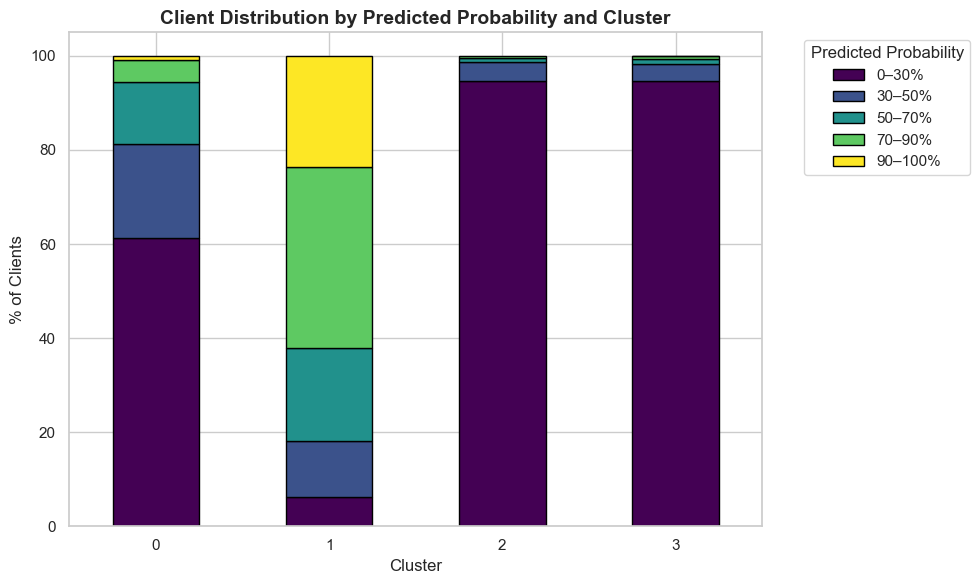

In [34]:
# Create a cross-tab of clusters vs. predicted probability ranges (%)
proba_cluster_ct = pd.crosstab(test_df_encoded['cluster'], test_df_encoded['proba_range'], normalize='index') * 100

# Define custom color palette
colors = ['#440154', '#3b528b', '#21918c', '#5ec962', '#fde725']

# Plot
sns.set(style="whitegrid")
ax = proba_cluster_ct.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors,
    edgecolor='black'
)

plt.title("Client Distribution by Predicted Probability and Cluster", fontsize=14, weight='bold')
plt.xlabel("Cluster", fontsize=12)
plt.ylabel("% of Clients", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Predicted Probability", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

- **Cluster 1 stands out as the most valuable segment:** over 40% of its clients have a predicted subscription probability above 70%, including a noticeable portion in the 90–100% range. This cluster should be prioritized for campaign targeting.

- **Clusters 2 and 3 are dominated by low-probability clients:** More than 90% of clients in these clusters fall in the 0–30% probability range, suggesting limited immediate conversion potential.

- **Cluster 0 is more mixed:** While the majority of clients fall in the lower ranges (0–50%), there is still a moderate percentage with higher probabilities, which may justify selective follow-up efforts.

In [35]:
# Export cleaned test set with predictions

# 1. Assign probability ranges (replace en dash with hyphen)
test_df_encoded['proba_range'] = pd.cut(
    test_df_encoded['y_proba'],
    bins=[0, 0.3, 0.5, 0.7, 0.9, 1.0],
    labels=['0-30%', '30-50%', '50-70%', '70-90%', '90-100%'],
    include_lowest=True
)

# 2. Replace 'pdays' value 999 with -1 to indicate 'Never Contacted'
test_df['pdays'] = test_df['pdays'].replace(999, -1)

# 3. Create human-readable indicator for prior contact
test_df['contacted_before'] = test_df['pdays'].apply(lambda x: 'Never' if x == -1 else 'Yes')

# 4. Add prediction outputs from encoded test set
test_df['y_proba'] = test_df_encoded['y_proba']
test_df['proba_range'] = test_df_encoded['proba_range']
test_df['high_prob_flag'] = test_df_encoded['high_prob_flag']

# 5. Convert binary flag to visual label
test_df['conversion_potential'] = test_df['high_prob_flag'].map({
    1: '≥70%',
    0: '<70%'
})

# 6. Map cluster numbers to business-friendly labels
cluster_labels = {
    1: "Cluster 1: Highest Conversion",
    0: "Cluster 0: Moderate Conversion",
    3: "Cluster 3: Low Conversion",
    2: "Cluster 2: Very Low Conversion"
}
test_df['cluster'] = test_df_encoded['cluster']
test_df['cluster_label'] = test_df['cluster'].map(cluster_labels)

# 7. Export to Excel (cleaned and business-ready)
test_df.to_excel("test_cleaned_with_predictions.xlsx", index=False)

print("test_cleaned_with_predictions.csv exported successfully.")

test_cleaned_with_predictions.csv exported successfully.


In [36]:
# Step 1: Create business-friendly cluster labels
cluster_labels = {
    1: "Cluster 1: Highest Conversion",
    0: "Cluster 0: Moderate Conversion",
    3: "Cluster 3: Low Conversion",
    2: "Cluster 2: Very Low Conversion"
}
train_df_encoded['cluster_label'] = train_df_encoded['cluster'].map(cluster_labels)

# Step 2: Attach clusters and labels back to the original (non-encoded) training dataset
# Make a copy to preserve original structure
train_export = train_df.copy()

# Reattach cluster number and label
train_export['cluster'] = train_df_encoded['cluster']
train_export['cluster_label'] = train_df_encoded['cluster_label']

# Step 3: Export to Excel for Power BI
train_export.to_excel("training_with_clusters.xlsx", index=False)

print("training_with_clusters.xlsx exported successfully.")


training_with_clusters.xlsx exported successfully.


# 10. Business Insights and Recommendations

This analysis combined a classification model and client segmentation to help the bank improve the effectiveness of its marketing campaigns for term deposit subscriptions. Below are the main business findings and actionable recommendations based on both predictive modeling and behavioral clustering.


### 10.1. Test Set Results Summary
The model was applied to a test dataset of 11,818 clients. All insights below refer to predicted behavior, not historical outcomes. This represents how the model can be used to prioritize and segment future leads.

- 82% of test clients fall in the 0–30% predicted probability range.

- Cluster 1 concentrates 74% of the high-probability clients (≥90%).

- Cluster 3 includes over 7,000 clients with very low predicted probability.

- Cluster 0 is more mixed, with a moderate number of promising leads.

---

## Key Insights

### 10.2. Predictive Model: Targeting Likely Subscribers

After applying SMOTE and adjusting the decision threshold, the classification model improved its ability to detect real subscribers from **26% (baseline)** to **54% recall**.  
This means the model can now identify **more than half of the clients who are likely to say "yes"** to a term deposit.

**How this helps:**

- The bank can focus campaigns on clients with higher probability scores (`y_proba`).
- This avoids spending time and budget on people unlikely to convert.
- In combination with segmentation, each prediction can be assigned to a cluster (e.g., “this client has a 70% chance of subscribing and belongs to Cluster 1”).

**What we observed:**

- Among all clients with a predicted probability ≥ 70%,  
  **63% belong to Cluster 1**, which aligns with its high historical conversion rate.
- **Cluster 0**, despite having a lower proportion (16%), contains the **largest number of high-probability clients** in absolute terms (1,400 clients).
- **Clusters 2 and 3** had very few clients with high predicted probability, confirming they are less likely to convert.

This analysis confirms that the **predictive model and segmentation reinforce each other**, allowing the business to **target the right clients, with the right offer, at the right time**.

---

### 10.3.Segmentation Analysis

#### Segment 1 – High Conversion Leads (Cluster 1)

- **Conversion rate:** ~64%
- **Profile:** Married, older clients with university degrees and successful prior campaign responses.
- **Behavior:** Low number of contacts, yet strong response.
- **Financial context:** Many have existing loans — suggesting trust in the bank and openness to additional products.

**Why it matters:**  
This group demonstrates strong engagement and represents the **highest return potential** for personalized deposit campaigns.

**Opportunity:**  
Design loyalty-based or bundled offers that reward existing clients. Promote term deposits as a **credit enhancement tool**, helping clients qualify for other products such as loans or investment services.

---

#### Segment 0 – Moderate Conversion, Broad Audience (Cluster 0)

- **Conversion rate:** 20% — second highest after Cluster 1.
- **Profile:** Mixed demographic with low education, some loans, and moderate campaign exposure.
- **Behavior:** Limited past contact, neutral responsiveness.
- **Economic context:** Operated during difficult periods (low employment variation and Euribor), but still converted relatively well.

**Why it matters:**  
This group offers **significant volume** with moderate potential, making it a good target for scaled campaigns with controlled cost.

**Recommendation:**  
Use targeted messaging. Position deposits as a **safe investment option**, especially for clients looking to stabilize finances or plan for future purchases.

---

#### Segment 3 – New or Untapped Clients (Cluster 3)

- **Conversion rate:** ~5%
- **Profile:** Broad, mostly new contacts, low engagement, neutral economic timing.
- **Behavior:** Very limited previous interaction, low conversion.
- **Financial profile:** Some have loans, but limited signs of banking relationship.

**Recommendation:**  
Avoid pushing direct deposit offers. Instead, explore onboarding journeys or educational strategies to gradually increase awareness and engagement.

---

#### Segment 2 – Cold Leads Overcontacted (Cluster 2)

- **Conversion rate:** ~4%
- **Profile:** Primarily blue-collar, basic education, many with housing loans.
- **Behavior:** Heavily contacted (~13 times) without prior engagement.
- **Economic context:** Surprisingly positive (above-average employment and interest rate indicators), but with very low response.

**Why it matters:**  
These clients show **little interest despite high effort**. Continuing to pursue them likely results in diminishing returns.

**Recommendation:**  
Pause or reframe campaigns to this group. Try different messaging or awareness-building content rather than direct offers.

---

### 10.4. Education as a Conversion Driver

- Clients with **university degrees** had significantly higher conversion and prediction rates.
- Those with basic education converted much less, even with repeated contact.

**Opportunity:**  
Create **educational or benefit-driven messaging** to explain what a term deposit is, why it matters, and how it can support personal or financial goals.

---

### 10.5. Economic Indicators: Limited Predictive Power, but Contextual Value

We examined the following economic variables:

- **Employment variation rate** (`emp.var.rate`)
- **Consumer price index** (`cons.price.idx`)
- **Consumer confidence index** (`cons.conf.idx`)
- **Euribor 3-month rate** (`euribor3m`)
- **Number of employees** (`nr.employed`)

While these metrics reflect macroeconomic context, they **did not consistently predict client behavior**.  
For example, **Cluster 1 converted at 64% despite operating during periods of negative employment variation and low Euribor rates**, showing that **trust, relationship history, and profile** mattered more than external conditions.

---

### 10.6. Campaign Timing: Needs Further Exploration

We observed that **December and March** had higher conversion rates, even though fewer clients were contacted.  
This may reflect seasonal openness to saving — for example:

- **End-of-year bonuses (December)**
- **Start-of-year financial planning (March)**
- **Psychological triggers related to holidays or tax season**

**Caution:**  
These results are not statistically robust due to low contact volume. Future campaigns should deliberately test **time-of-year effects** under controlled conditions to confirm these early signs.

---

## Strategic Recommendations

- Use the model's **predicted probabilities** to score leads and **prioritize outreach** based on likelihood to convert.
- Combine prediction and segmentation: focus **first on high-probability clients in Cluster 1**, and second on promising cases in Cluster 0.
- Avoid over-targeting Clusters 2 and 3 unless re-engagement or awareness campaigns are planned.
- Promote term deposits as a **safe investment** — not as debt — especially to clients with existing loans who may see this as a **path to qualify for better credit conditions**.
- Explore seasonality in conversion patterns using A/B testing in months like March and December.
- Continue monitoring economic indicators for context, but base targeting strategies primarily on **client profile and engagement history**.